In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

def import_matplotlib_style(label_size = 16):


    font = {'family' : 'monospace',
            'weight' : 'normal',
            'size'   : label_size}

    mpl.rc('font', **font)

    params = {'legend.fontsize': label_size,
              'figure.figsize': (7, 5),
              'axes.labelsize': label_size,
              'axes.titlesize':label_size,
              'xtick.labelsize':label_size,
              'ytick.labelsize':label_size}
    mpl.rcParams.update(params)

import_matplotlib_style()


In [2]:
df = pd.read_csv('optical_flares_FFD_slopes_literature.csv', dtype=str)
df = df[df.ignore=="0"]
df.columns.values

array(['author', 'slopemin', 'slopemax', 'notes', 'energymin',
       'energymax', 'notes.1', 'SpT min', 'SpT max', 'nstars', 'nflares',
       'Unnamed: 11', 'ignore'], dtype=object)

In [3]:
df

,author,slopemin,slopemax,notes,energymin,energymax,notes.1,SpT min,SpT max,nstars,nflares,Unnamed: 11,ignore
0,Hawley et al. (2014),"1,95","2,01","min = binned, max=cumulative",NaN,NaN,NaN,M,M,6,1305,"LSq with Poisson uncertainty, increase the low...",0
2,Gizis+2017,"1,6",2,NaN,31,33,NaN,M7,M7,1,22,"de-biased MLE (Arnold2015), weight each point ...",0
3,Paudel+2018,"1,3",2,NaN,29,"33,5",NaN,M6,L0,10,283,"ML from a paper in 2010, used emcee (Foreman-M...",0
4,Lacy+1976,"1,43",2,NaN,29,"32,5",NaN,M0,M6,8,386,graphical linear Lsq,0
6,Lurie+2015,"1,92","2,03",NaN,"30,2","33,2",Kepler band,M5,M5,2,1288,Bayesian MCMC based algorithm from Kelly 2007 ...,0
7,Shakhovskaya+1989,"1,4","2,4",NaN,29,36,NaN,K0,M8,35,200,"linear representation, power laws from\nGershb...",0
8,Yang+2017,"1,72","2,42",NaN,32,35,NaN,K8,M5.5,540,102187,binned FFDs,0
9,Howard+2019,"1,84","2,34",NaN,32,"35,5",bol,K5,M4,284,575,"fit cumulative power law, MCMC for uncertainties",0
10,Hilton+2011,"1,63","1,83",NaN,30,35,NaN,M0,M8,39,239,linear fit to log-log plot,0
11,Shibayama+2013,2,"2,2","min = slow rotators, max=all stars","34,5",36,NaN,F9,K2,279,1547,consistent with Maehara+2012,0


In [4]:
totflares=df.nflares.astype(float).sum()
totflares

126478.0

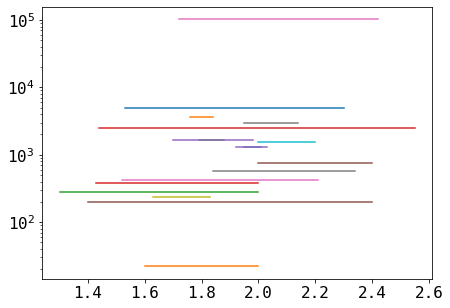

In [5]:
for label, row in df[["slopemin", "slopemax","nflares"]].dropna(how="any").iterrows():
    plt.plot([float(str(row.slopemin.replace(",","."))), float(str(row.slopemax.replace(",",".")))], [int(row.nflares)]*2)
plt.yscale("log")

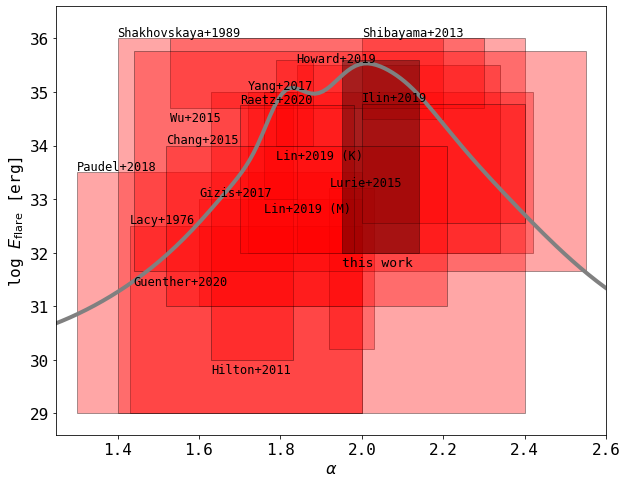

In [6]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def floatify(x):
    return float(str(x).replace(",","."))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

fix, ax = plt.subplots(1, figsize=(9,7))
#
alphas = np.linspace(0,4,400)
g = np.zeros_like(alphas)
boxes = []
for label, row in df[["slopemin", "slopemax","energymin", "energymax","author", "nflares"]].dropna(how="any").iterrows():
    mi , ma, nflares = floatify(row.slopemin), floatify(row.slopemax), floatify(row.nflares)
    g = g + gaussian(alphas, (mi + ma)/2, (ma - mi)/2, ) * np.sqrt(nflares / totflares)
    f = Rectangle((mi, floatify(row.energymin)),
             ma-mi,
             floatify(row.energymax) - floatify(row.energymin))
    if row.author in ["Hilton2011","Lin+2019 (M)","Lin+2019 (K)",
                      "Wu+2015", "Hilton+2011", "Guenther+2020",]:
                     # "Raetz+2020"] :
        ax.text(mi, floatify(row.energymin)-0.25, row.author, fontsize=12)
        boxes.append(f)
    elif row.author == "this work":
        ax.text(mi, floatify(row.energymin)-0.25, row.author, fontsize=13)
        pc = PatchCollection([f], facecolor="k", alpha=.35,
                     edgecolor="k")
        ax.add_collection(pc,)
    else:
        ax.text(mi, floatify(row.energymax)+0.05, row.author, fontsize=12)
        boxes.append(f)
ax.plot(alphas, 30+g*3, c="grey", linewidth=4)
# Create patch collection with specified colour/alpha
pc = PatchCollection(boxes, facecolor="r", alpha=.35,
                     edgecolor="k", zorder=-1)
ax.add_collection(pc)

plt.xlim(1.25,2.6)
plt.ylim(28.6,36.6)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"log $E_\mathrm{flare}$ [erg]")
plt.tight_layout()
#plt.savefig("overview_alpha_literature.png", dpi=300)
plt.savefig("Flares_in_Clusters_with_K2_2/pics/appendix/overview_alpha_literature.png", dpi=300)

In [15]:
alphas = np.linspace(0,4,400)
g = np.zeros_like(alphas)

for label, row in df[["slopemin", "slopemax","energymin", "energymax","author"]].dropna(how="any").iterrows():
    mi , ma = floatify(row.slopemin), floatify(row.slopemax) 
    g = g + gaussian(alphas, (mi + ma)/2, (ma - mi)/2, )

In [36]:
df.nflares.astype(float)

0          NaN
2         22.0
3        283.0
4        386.0
6          NaN
7        200.0
8     102187.0
9        575.0
10       239.0
11      1547.0
12      4944.0
13      3589.0
14      1647.0
15      2520.0
16      1662.0
17       751.0
Name: nflares, dtype: float64

In [15]:
alphas[np.argmax(g)]

1.9849624060150375

In [3]:
np.log10(4e35)

35.60205999132796